### Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

### For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.m

In [54]:
# imports
from prepare import stores_sales_items_complete
from prepare import prep_all_data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prepare import germany_acquire_prep

import warnings
warnings.filterwarnings("ignore")

# HEB DATA
***

## Acquiring and Prepping Data

In [55]:
# importing all data 
df = stores_sales_items_complete()

# prepping data
df = prep_all_data(df)

# previewing data
df.head()

,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,day_week,month,sales_total
sale_date,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,Tuesday,January,10.92
2013-01-01 00:00:00+00:00,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,Tuesday,January,218.40
2013-01-01 00:00:00+00:00,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,Tuesday,January,125.55
2013-01-01 00:00:00+00:00,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,Tuesday,January,453.60
2013-01-01 00:00:00+00:00,12,35.0,215469,9,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,Tuesday,January,294.00


In [64]:
# splitting data

# setting % of original DFs rows that train will contain
train_size = .70

# getting count of original DFs rows
n = df.shape[0]

# calculating number of rows that train will contain
train_row_count = round(train_size * n)

# gathering # of rows from original df equal to train_row_count
train = df[:train_row_count] 

# gathering # of rows from original df minus train_row_count
test = df[train_row_count:] 

# checking train shape to see if columns and rows are correct after split
train.shape

(639100, 18)

In [65]:
# making copy of df to explore with
# in case we need to get a new copy of our train DF, we wont need to run our prep function again since
# it takes time to run (probably due to all the datetime updates)
traindf = train.copy()

## Exploration

In [66]:
# setting default values for plot fonts and figure size
plt.rc('font', size=13)
plt.rc('figure', figsize=(13, 7))

Text(0.5, 1.0, 'Sales by Month')

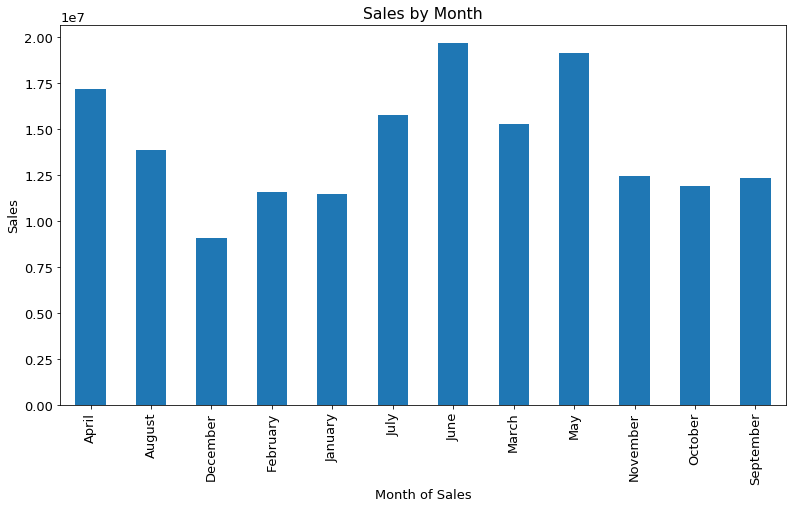

In [67]:
# total sales by month

# grouping data by months and summing total sales for each month
# creating bar plot from resulting data
traindf.groupby('month').sales_total.sum().plot.bar()

# setting x axis label, y axis label, and plot title
plt.xlabel("Month of Sales")
plt.ylabel("Sales")
plt.title('Sales by Month')

- April, May and June had the highest sales
- In the future when using month names, I'll need to add numerical values to begining of each month so that when plotted, they appear in their natural order

Text(0.5, 1.0, 'Sales by Weekday')

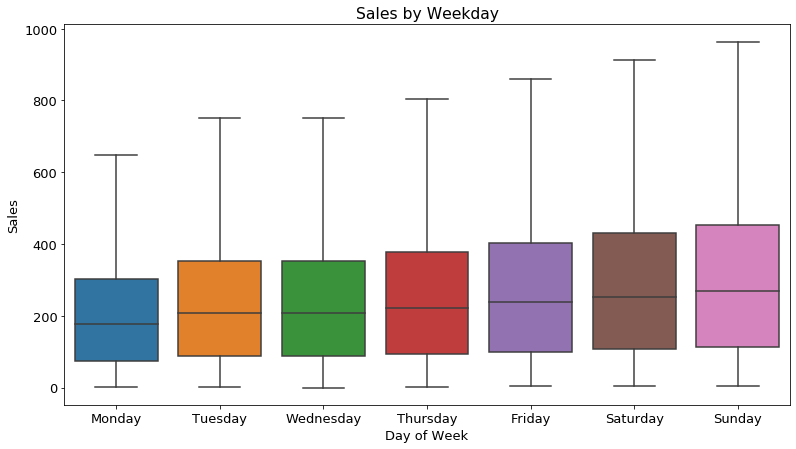

In [68]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.boxplot(data=traindf, y='sales_total', x='day_week', order=order,showfliers = False)
plt.xlabel("Day of Week")
plt.ylabel("Sales")
plt.title('Sales by Weekday')

- The average amount of sales gradually increases from Monday through Sunday but only by a very negligible amount.
- The maximum value of sales also gradually increases from Monday through Sunday and it's increase is far more noticeable than the increase of the average.
- The minimum value of sales remains at a constant 0 throughout the week.

Text(0, 0.5, 'Sales')

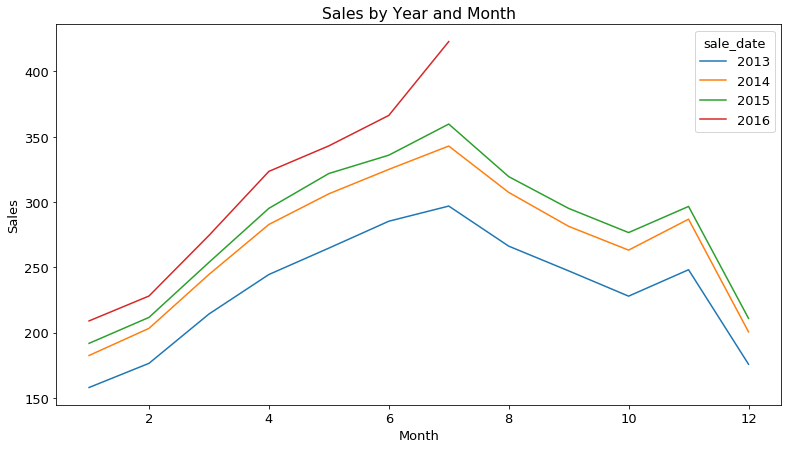

In [69]:
# setting y equal to target variable, sales_total
y = traindf.sales_total

# grouping by year and month
# .unstack turns an index level into columns
# finding mean for each month/year pair
# plotting resulting DF
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Sales by Year and Month')
plt.xlabel("Month")
plt.ylabel("Sales")

- 2016 data is cut short because when we split our train data from our test data, the train data only contained rows for data up to around July 2016
    - We could make the 2016 line complete by imputing values into the empty values in the source DF
- Years 2013 - 2015 all have a nearly identical shape, albeit as the years pass, sales have increased
    - Year 2016 appears to be on track to have a similar shape as well, but since the data is cut off, we can't see how the rest of the line would look with only our current data

# GERMANY DATA
***

### Acquiring and Prepping Data

In [70]:
# acquiring data
gdf = germany_acquire_prep()

# previewing data
gdf.head()

,Consumption,Wind,Solar,Wind+Solar,year,month
Date,,,,,,
2006-01-01,1069.184,164.814173,89.258695,254.072867,2006,January
2006-01-02,1380.521,164.814173,89.258695,254.072867,2006,January
2006-01-03,1442.533,164.814173,89.258695,254.072867,2006,January
2006-01-04,1457.217,164.814173,89.258695,254.072867,2006,January
2006-01-05,1477.131,164.814173,89.258695,254.072867,2006,January


In [71]:
# setting default values for plot fonts and figure size
plt.rc('font', size=13)
plt.rc('figure', figsize=(13, 7))

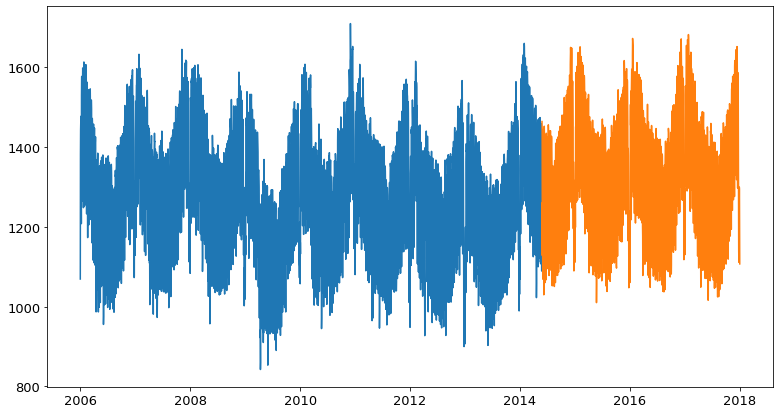

In [72]:
# splitting data

# setting % of original gdfs rows that train will contain
train_size = .70

# getting count of original gdfs rows
n = gdf.shape[0]

# calculating number of rows that train will contain
train_row_count = round(train_size * n)

# gathering # of rows from original gdf equal to train_row_count
train = gdf[:test_start_index] 

# gathering # of rows from original gdf minus train_row_count
test = gdf[test_start_index:] 

# plotting data to confirm split was successful
plt.plot(train.index, train.Consumption)
plt.plot(test.index, test.Consumption)
plt.show()

### Exploration

In [73]:
# making copy of df to explore with
# in case we need to get a new copy of our train DF, we wont need to run our prep function again since
# it takes time to run (probably due to all the datetime updates)
traing = train.copy()

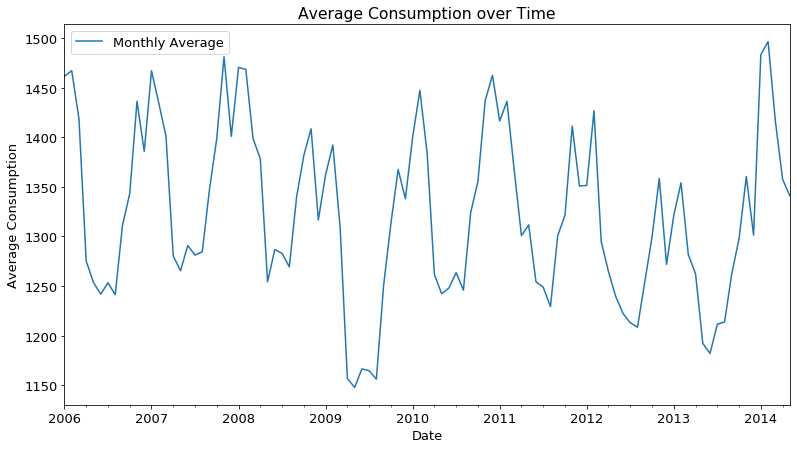

In [78]:
# set y equal to target variable, consumption
y = traing.Consumption

# resampling by month, calculating mean of each month, plotting
y.resample('M').mean().plot(label= 'Monthly Average')

# setting y label, legend, and showing plot
plt.ylabel("Average Consumption")
plt.title("Average Consumption over Time")
plt.legend()
plt.show()

Text(0, 0.5, 'Consumption')

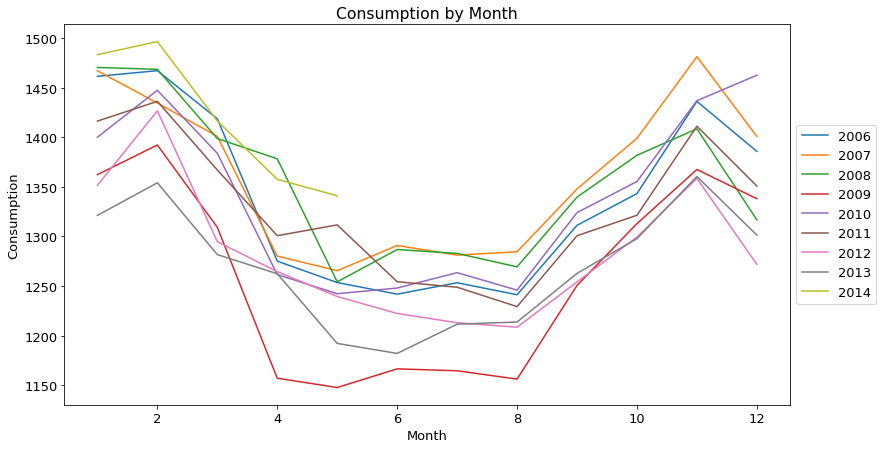

In [84]:
# setting y equal to target variable, sales_total
y = traing.Consumption

# grouping by year and month
# .unstack turns an index level into columns
# finding mean for each month/year pair
# plotting resulting DF
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Consumption by Month')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Month")
plt.ylabel("Consumption")

- January through March and October through December seem to be the periods where consumption peaks
- As with the HEB data, since our data source, the train data set, ends in mid 2016, our 2016 line doesnt reflect data from June onwards
    - Although from the data it does reflect, it appears to have the same general trends as the other years

Text(0.5, 1.0, 'Consumption by Year')

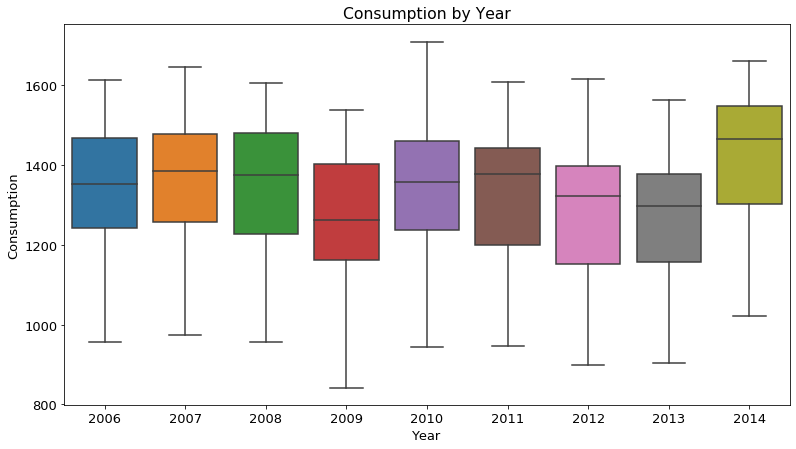

In [86]:
# creating boxplot consumption by year
sns.boxplot(data=traing, y='Consumption', x='year',showfliers = False)

# setting labels and title
plt.xlabel("Year")
plt.ylabel("Consumption")
plt.title('Consumption by Year')

- Average consumption was highest in 2014
- Average consumption was lowest in 2009
- 2009 and 2014 are also the years we see the largest changes in average consumption from one year to the next